# Telecomunication Customer Churn

## Business Problem Understanding

**Context**  
Sebuah perusahaan yang bergerak di bidang telekomunikasi memiliki data yang mewakili profil pelanggan yang telah meninggalkan perusahaan telekomunikasi. Peralihan layanan telekomunikasi dan layanan berbasis langganan lainnya berarti situasi ketika pelanggan meninggalkan penyedia layanan.

Target :

Yes : Meninggalkan penyedia langganan

No : Tidak meninggalkan penyedia langganan

**Problem Statement :**

Jika customer meninggalkan penyedia langganan, perusahaan telekomunikasi akan kehilangan pemasukannya dan perlu biaya, waktu, dan usaha untuk menggantikan pelanggan yang meninggalkan penyedia pelanggan. 

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan telekomunikasi ingin memprediksi kemungkinan seorang customer yang akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

Dan juga, perusahaan ingin mengetahui faktor apa yang membuat seorang customer akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan customer akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya, waktu dan usaha

Type 2 error : False Negative  
Konsekuensi: kehilangan pemasukkan jadi tidak terduga dan lebih besar daripada yang sudah pasti meninggalkan penyedia langganan

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mencegah kehilangan pemasukkan perusahaan tersebut dan meminimalisir pengeluaran untuk mencari pelanggan baru. Jadi nanti metric utama yang akan kita gunakan adalah Precision-Recall Score.

## Data Understanding

- `Dependents` - Customer memiliki tanggungan atau tidak
- `Tenure` - Lamanya customer tetap di perusahaan (bulan)
- `OnlineSecurity` - Customer memiliki keamanam online atau tidak
- `OnlineBackup` - Customer memiliki Back up online atau tidak
- `InternetService` - Penyedia layanan internet customer
- `DeviceProtection` - Customer memiliki perlindungan perangkat atau tidak
- `TechSupport` - Customer memiliki dukungan teknis atau tidak
- `Contract` - Jenis kontrak berdasarkan durasi
- `PaperlessBilling` - Tagihan diterbitkan dalam bentuk paperless
- `MonthlyCharges` - Jumlah biaya layanan per bulan
- `Churn` - Customer meninggalkan atau tidak

In [71]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import  XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, PrecisionRecallDisplay

# Imbalance Dataset
from imblearn.over_sampling import SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

import pickle

In [72]:
#Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


Data terdiri dari 4930 baris dan 11 kolom

In [73]:
# jumlah data terisi and datatype tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Tidak ada missing values

In [74]:
df.duplicated().sum()

77

Ada 77 duplikasi data

## Data Cleaning

Drop duplikasi data

In [75]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(4853, 11)

In [76]:
df_deskripsi = df.describe().T
df_deskripsi

,count,mean,std,min,25%,50%,75%,max
tenure,4853.0,32.679992,24.395554,0.0,9.00,29.0,56.00,72.00
MonthlyCharges,4853.0,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65


In [77]:
df_deskripsi['IQR'] = df_deskripsi['75%'] - df_deskripsi['25%']
df_deskripsi['Lower'] = df_deskripsi['25%'] - 1.5*df_deskripsi['IQR']
df_deskripsi['Upper'] = df_deskripsi['75%'] + 1.5*df_deskripsi['IQR']
df_deskripsi['Outlier'] = [df[(df['tenure'] < df_deskripsi['Lower']['tenure']) | (df['tenure'] > df_deskripsi['Upper']['tenure'])]['tenure'].count(),
                           df[(df['MonthlyCharges'] < df_deskripsi['Lower']['MonthlyCharges']) | (df['MonthlyCharges'] > df_deskripsi['Upper']['MonthlyCharges'])]['MonthlyCharges'].count()]
df_deskripsi

,count,mean,std,min,25%,50%,75%,max,IQR,Lower,Upper,Outlier
tenure,4853.0,32.679992,24.395554,0.0,9.00,29.0,56.00,72.00,47.0,-61.50,126.50,0
MonthlyCharges,4853.0,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65,50.0,-34.95,165.05,0


Tidak ada outlier

Data setelah cleaning

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 417.2+ KB


data terdiri dari 4853 baris dan 11 kolom

In [79]:
df['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [80]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [81]:
df['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [82]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [83]:
df['DeviceProtection'].unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [84]:
df['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [85]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [86]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

di kolom OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport ada value "No internet service". Dapat direplace dengan "No". No internet service dan no artinya sama

In [88]:
df['OnlineSecurity'].replace('No internet service','No', inplace=True)
df['OnlineBackup'].replace('No internet service','No', inplace=True)
df['DeviceProtection'].replace('No internet service','No', inplace=True)
df['TechSupport'].replace('No internet service','No', inplace=True)

In [89]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [90]:
df['OnlineBackup'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
df['DeviceProtection'].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
df['TechSupport'].unique()

array(['Yes', 'No'], dtype=object)

## EDA

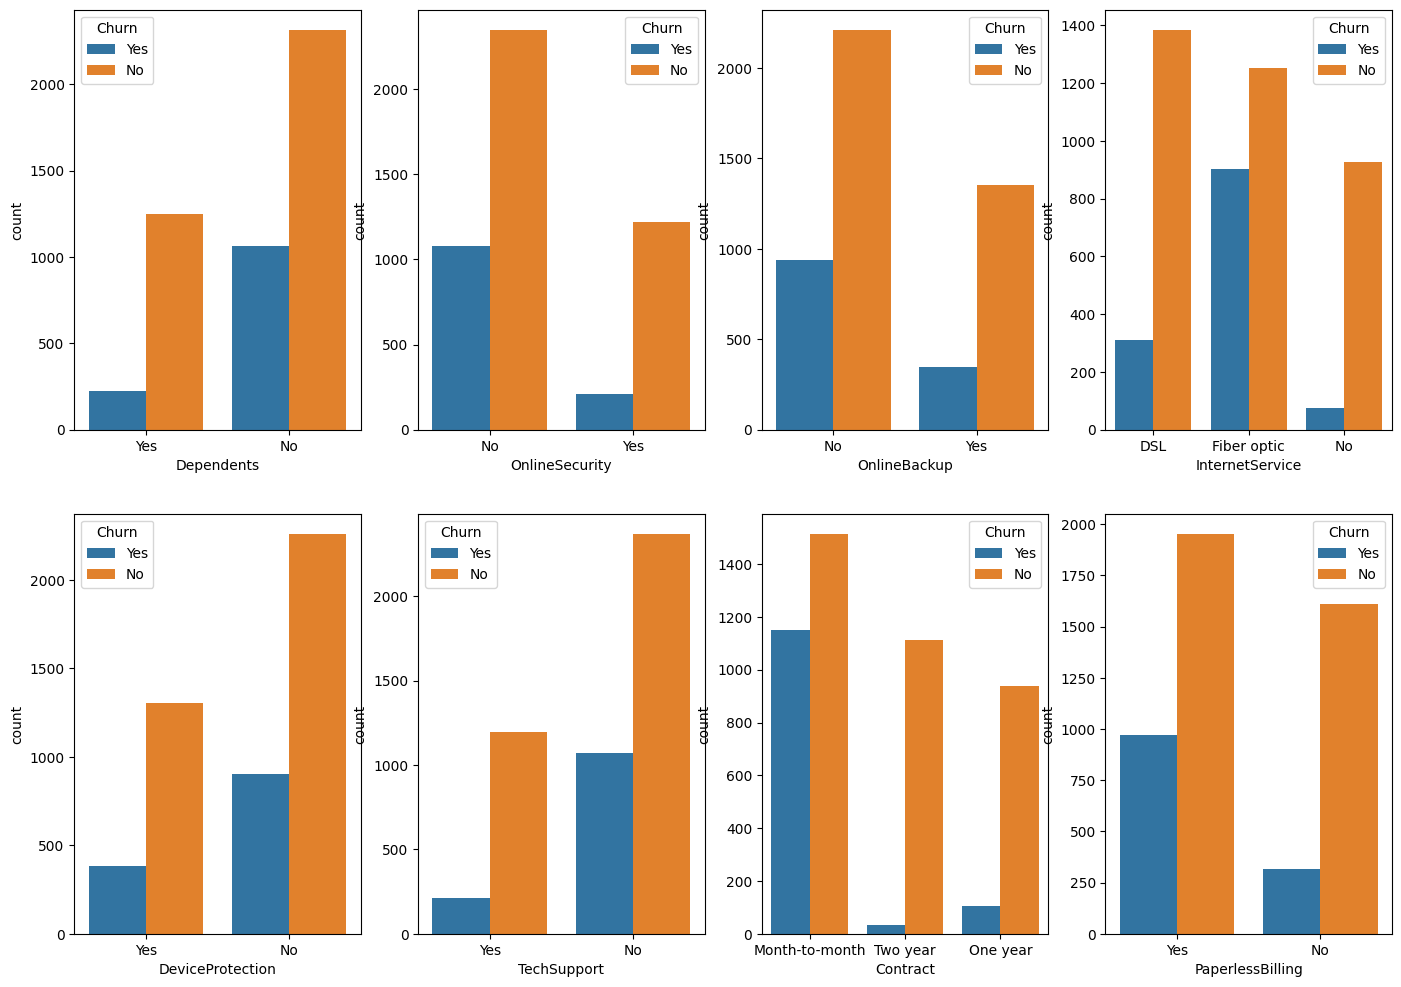

In [93]:
plt.figure(figsize=(17,12))

plt.subplot(241)
sns.countplot(data=df,x='Dependents',hue='Churn');

plt.subplot(242)
sns.countplot(data=df,x='OnlineSecurity',hue='Churn');

plt.subplot(243)
sns.countplot(data=df,x='OnlineBackup',hue='Churn');

plt.subplot(244)
sns.countplot(data=df,x='InternetService',hue='Churn');

plt.subplot(245)
sns.countplot(data=df,x='DeviceProtection',hue='Churn');

plt.subplot(246)
sns.countplot(data=df,x='TechSupport',hue='Churn');

plt.subplot(247)
sns.countplot(data=df,x='Contract',hue='Churn');

plt.subplot(248)
sns.countplot(data=df,x='PaperlessBilling',hue='Churn');
plt.show()

Yang berpotensi meninggalkan penyedia langganan adalah yang tidak memiliki tanggungan (Dependents), keamanan online (OnlineSecurity), back up online, perlindungan perangkat (DeviceProtection), dan dukungan teknis (TechSupport); Layanan internet menggunakan fiber optic, kontrak bulanan, dan menggunakan tagihan paperless.

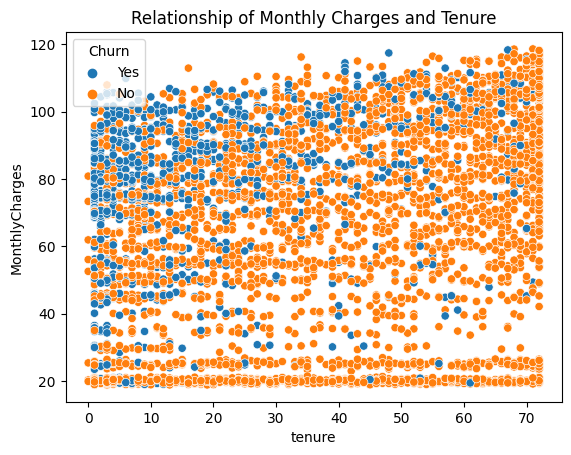

In [94]:
sns.scatterplot(data=df, 
                x='tenure',
                y='MonthlyCharges',
                hue='Churn');
plt.title('Relationship of Monthly Charges and Tenure');

- Yang berpotensi meninggalkan penyedia langganan adalah customer dengan biaya layanan di atas 20 dollar per bulan
- Semakin pendek tenure, customer churn semakin banyak
- Tidak ada korelasi antara biaya layanan per bulan dengan lamanya customer tetap di perusahaan

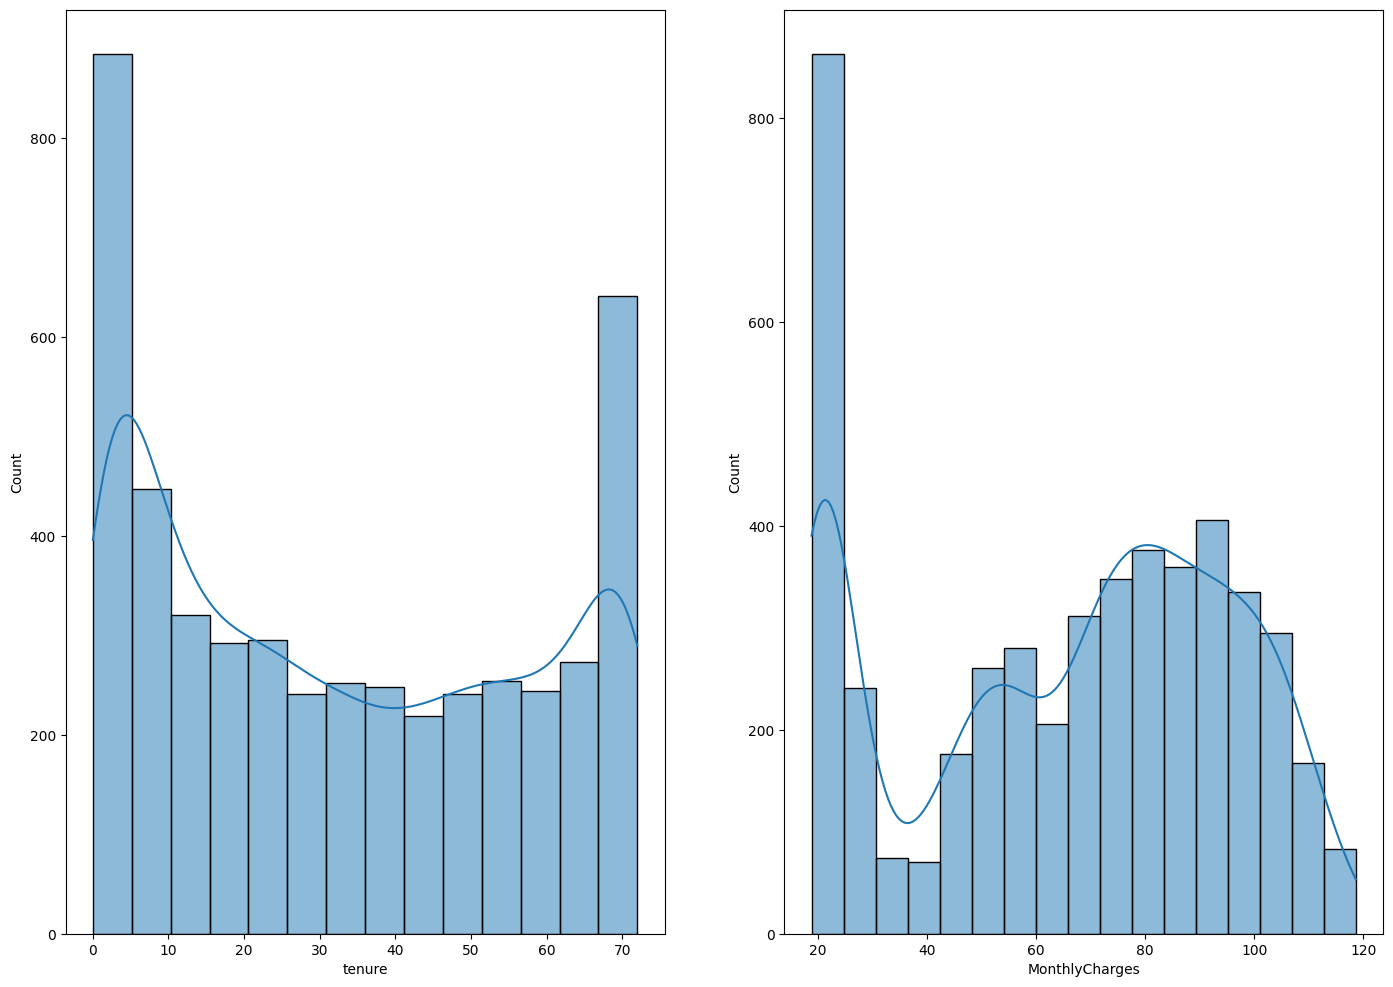

In [95]:
plt.figure(figsize=(17,12))

plt.subplot(121)
sns.histplot(data=df, x='tenure', kde=True);

plt.subplot(122)
sns.histplot(data=df, x='MonthlyCharges', kde=True);
plt.show()

Distribusi data tenure dan MonthlyCharges tidak normal 

## Data Preprocessing

In [96]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


In [97]:
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

Berdasarkan EDA yang dibuat, semua feature berpengaruh pada Churn. Sehingga, feature tersebut dipakai semuanya. 

In [98]:
y.value_counts() / len(y)
# imbalance

Churn
No     0.734597
Yes    0.265403
Name: count, dtype: float64

In [99]:
print('X shape\t\t:', X.shape)
print('y shape\t\t:', y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (4853, 10)
y shape		: (4853,)

X_train shape	: (3882, 10)
y_train shape	: (3882,)

X_test shape	: (971, 10)
y_test shape	: (971,)


In [100]:
label = LabelEncoder()

label.fit(y_train)

y_train_encode = label.transform(y_train)
y_test_encode = label.transform(y_test)

In [101]:
label.classes_

array(['No', 'Yes'], dtype=object)

In [102]:
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'No' 'No' 'No' 'Yes']
[0 0 0 0 1]


Pada kolom Churn, value Yes diencode menjadi 1, sedangkan No menjadi 0

Untuk encoding, menggunakan one-hot encoding karena feature tidak ada urutan dan jumlah unique value pada kolom kategorikal sedikit. Apabila feature hanya memiliki 2 kategori, 1 kategori didrop untuk menghindari multicollinearities dan kolom yang berlebihan.

In [103]:
kolomkategorikal =['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

In [104]:
onehot = OneHotEncoder(sparse=False, drop='if_binary')

onehot.fit(X_train[kolomkategorikal])

X_train_onehot = onehot.transform(X_train[kolomkategorikal])
X_test_onehot = onehot.transform(X_test[kolomkategorikal])

In [105]:
X_train_onehot

array([[0., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 1.]])

In [106]:
kolomonehot = onehot.get_feature_names_out()
kolomonehot

array(['Dependents_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes'], dtype=object)

In [107]:
X_train.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
3738,No,67,Yes,Yes,DSL,No,Yes,Two year,Yes,50.95
3311,Yes,71,Yes,Yes,DSL,Yes,Yes,Two year,No,85.45
2379,No,15,No,No,No,No,No,Month-to-month,Yes,26.35
261,No,31,Yes,No,Fiber optic,No,No,Month-to-month,No,89.45
107,No,36,No,No,Fiber optic,No,No,Month-to-month,Yes,84.10


In [108]:
# buat dataframe dari feature yang telah diencode one-hot
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=kolomonehot, index=X_train.index)

# kombinasi feature yang telah diencode dengan numerikal
X_train_encode = pd.concat([X_train.drop(columns=kolomkategorikal), X_train_onehot_df], axis=1)
X_train_encode.head()

,tenure,MonthlyCharges,Dependents_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes
3738,67,50.95,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3311,71,85.45,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2379,15,26.35,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
261,31,89.45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
107,36,84.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [109]:
X_test.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
4265,No,15,No,Yes,Fiber optic,No,No,Month-to-month,Yes,83.20
159,No,18,No,No,Fiber optic,No,No,Month-to-month,No,78.55
281,No,72,No,No,Fiber optic,Yes,No,Two year,Yes,97.85
225,Yes,18,No,No,DSL,No,No,Month-to-month,Yes,45.65
1345,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,Yes,112.60


In [110]:
# buat dataframe dari feature yang telah diencode one-hot
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=kolomonehot, index=X_test.index)

# kombinasi feature yang telah diencode dengan numerikal
X_test_encode = pd.concat([X_test.drop(columns=kolomkategorikal), X_test_onehot_df], axis=1)
X_test_encode.head()

,tenure,MonthlyCharges,Dependents_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes
4265,15,83.20,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
159,18,78.55,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
281,72,97.85,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
225,18,45.65,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1345,72,112.60,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [111]:
# Kombinasi X-train and X-test
df_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# Kombinasi dengan y-train
df_encode = df_encode.join(pd.Series(y_train_encode, name='Churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# Kombinasi dengan y-test
df_encode = df_encode.join(pd.Series(y_test_encode, name='Churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# Gabung kolom y-train dan y-test
df_encode['Churn_1'].fillna(df_encode['Churn_2'], inplace=True)
df_encode.drop(columns='Churn_2', inplace=True)
df_encode.rename(columns={'Churn_1':'Churn'}, inplace=True)

df_encode.head()

,tenure,MonthlyCharges,Dependents_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn
3738,67,50.95,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3311,71,85.45,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2379,15,26.35,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
261,31,89.45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,36,84.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


Untuk scaling, menggunakan min-max scaling karena distribusi data pada feature kolom numerikal tidak normal

In [112]:
X_train_encode_scale = X_train_encode.copy()
X_test_encode_scale = X_test_encode.copy()

scaler = MinMaxScaler()
scaler.fit(X_train_encode_scale[['tenure', 'MonthlyCharges']])

X_train_encode_scale[['tenure', 'MonthlyCharges']] = scaler.transform(X_train_encode_scale[['tenure', 'MonthlyCharges']])
X_test_encode_scale[['tenure', 'MonthlyCharges']] = scaler.transform(X_test_encode_scale[['tenure', 'MonthlyCharges']])

In [113]:
# Kombinasi X-train and X-test
df_encode_scale = pd.concat([X_train_encode_scale, X_test_encode_scale], axis=0)

# Kombinasi dengan y-train
df_encode_scale = df_encode_scale.join(pd.Series(y_train_encode, name='Churn', index=X_train_encode_scale.index), lsuffix='_1', rsuffix='_2')

# Kombinasi dengan y-test
df_encode_scale = df_encode_scale.join(pd.Series(y_test_encode, name='Churn', index=X_test_encode_scale.index), lsuffix='_1', rsuffix='_2')

# Gabung kolom y-train dan y-test
df_encode_scale['Churn_1'].fillna(df_encode_scale['Churn_2'], inplace=True)
df_encode_scale.drop(columns='Churn_2', inplace=True)
df_encode_scale.rename(columns={'Churn_1':'Churn'}, inplace=True)

df_encode_scale.head()

,tenure,MonthlyCharges,Dependents_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn
3738,0.930556,0.321983,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3311,0.986111,0.667501,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2379,0.208333,0.075613,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
261,0.430556,0.707561,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,0.500000,0.653981,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


Karena dataset imbalance, akan diseimbangkan dengan metode oversampling SMOTE

In [114]:
smote = SMOTE(random_state=0)

# fit & resample
X_train_smote, y_train_smote = smote.fit_resample(X_train_encode_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Churn'])

df_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [115]:
df_smote['Churn'].value_counts()

Churn
0    2852
1    2852
Name: count, dtype: int64

## Modeling & Evaluation

In [116]:
logreg = LogisticRegression(max_iter=1000, random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

### Default Parameter

In [117]:
models = [logreg, knn, dt, rf, gboost, adaboost, xgboost]

cv_mean = []
cv_std = []
cv_all = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for i in models:
    model = i

    
    model_cv = cross_val_score(
        estimator=model, 
        X = X_train_encode_scale, 
        y = y_train_encode, 
        cv = 5, 
        scoring = 'f1',
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [118]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,"LogisticRegression(max_iter=1000, random_state=0)",0.574214,0.027880,"[0.5782, 0.5421, 0.5676, 0.6247, 0.5584]"
1,KNeighborsClassifier(),0.525655,0.011783,"[0.5199, 0.5368, 0.5206, 0.5414, 0.5095]"
2,DecisionTreeClassifier(random_state=0),0.492751,0.024889,"[0.5047, 0.5013, 0.4541, 0.4771, 0.5266]"
3,RandomForestClassifier(random_state=0),0.533023,0.011089,"[0.5395, 0.5503, 0.5175, 0.5281, 0.5297]"
4,GradientBoostingClassifier(random_state=0),0.576356,0.015071,"[0.5813, 0.5816, 0.5867, 0.5856, 0.5465]"
5,AdaBoostClassifier(random_state=0),0.576083,0.013287,"[0.5838, 0.5865, 0.56, 0.5902, 0.56]"
6,"XGBClassifier(base_score=None, booster=None, c...",0.568990,0.019190,"[0.5567, 0.5558, 0.5596, 0.6067, 0.5661]"


### After Oversampling

In [119]:
models = [logreg, knn, dt, rf, gboost, adaboost, xgboost]

cv_mean2 = []
cv_std2 = []
cv_all2 = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for i in models:
    model = i

    
    model_cv = cross_val_score(
        estimator=model, 
        X = X_train_smote, 
        y = y_train_smote, 
        cv = 5, 
        scoring = 'f1',
        error_score='raise'
        )

    cv_mean2.append(model_cv.mean())
    cv_std2.append(model_cv.std())
    cv_all2.append(model_cv.round(4))

In [120]:
df_cv2 = pd.DataFrame({
    'algo': models,
    'mean': cv_mean2,
    'std': cv_std2,
    'all': cv_all2
})

df_cv2

,algo,mean,std,all
0,"LogisticRegression(max_iter=1000, random_state=0)",0.773484,0.011522,"[0.7621, 0.759, 0.7749, 0.7823, 0.7891]"
1,KNeighborsClassifier(),0.797176,0.019036,"[0.7784, 0.7699, 0.8113, 0.8112, 0.8151]"
2,DecisionTreeClassifier(random_state=0),0.767903,0.041942,"[0.7213, 0.7125, 0.7966, 0.8003, 0.8088]"
3,RandomForestClassifier(random_state=0),0.830755,0.036942,"[0.7939, 0.7788, 0.8517, 0.8675, 0.862]"
4,GradientBoostingClassifier(random_state=0),0.807687,0.036599,"[0.7529, 0.7744, 0.8365, 0.8372, 0.8375]"
5,AdaBoostClassifier(random_state=0),0.793253,0.016844,"[0.7665, 0.7804, 0.8072, 0.8037, 0.8086]"
6,"XGBClassifier(base_score=None, booster=None, c...",0.820121,0.067268,"[0.7257, 0.7512, 0.872, 0.8805, 0.8713]"


Model terbaik Random Forest

Terlihat bahwa hasil evaluation metricsnya untuk F1 Score dari lebih baik setelah di oversampling daripada yang tanpa oversampling. 

Hal ini karena data customer yang churn diperbanyak menjadi sama dengan jumlah data customer yang tidak churn, sehingga presisi dan/atau recall naik. Dampak ini terhadap kasus permasalahan berarti model setelah di oversampling menjadi bertambahnya yang diprediksi churn dan kenyataannya churn juga, serta berkurangnya yang diprediksi churn tapi kenyataannya tidak churn dan sebaliknya. Sehingga, resiko kehilangan pemasukkan jadi tidak terduga dan lebih besar daripada yang sudah pasti meninggalkan penyedia langganan dan sia-sianya biaya, waktu dan usaha untuk mencari customer pengganti menjadi berkurang.

## Hyperparameter Tuning

Tuning Random Forest

In [121]:
hyperparam = {'n_estimators':range(60,90,10),
              'max_depth':range(1,4,1),
              'max_leaf_nodes':range(4,7,1),
              'max_samples':range(5,8,1)}

gs = GridSearchCV(
    estimator=rf,
    param_grid=hyperparam,
    cv = 5,
    scoring='f1',
    n_jobs=-1)

In [122]:
gs.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 4),
                         'max_leaf_nodes': range(4, 7),
                         'max_samples': range(5, 8),
                         'n_estimators': range(60, 90, 10)},
             scoring='f1')

In [123]:
gs.best_score_

0.7794645017217521

In [124]:
gs.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5, 'max_samples': 6, 'n_estimators': 70}

In [125]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
76,0.218907,0.006205,0.023050,0.005123,3,6,6,70,"{'max_depth': 3, 'max_leaf_nodes': 6, 'max_sam...",0.771654,0.772727,0.786960,0.790625,0.775357,0.779465,0.007798,1
67,0.213533,0.009451,0.023711,0.006222,3,5,6,70,"{'max_depth': 3, 'max_leaf_nodes': 5, 'max_sam...",0.771654,0.772727,0.786960,0.790625,0.775357,0.779465,0.007798,1
77,0.244320,0.004950,0.022886,0.002040,3,6,6,80,"{'max_depth': 3, 'max_leaf_nodes': 6, 'max_sam...",0.756669,0.771765,0.794562,0.790373,0.782344,0.779143,0.013665,3
68,0.255018,0.009492,0.029259,0.002654,3,5,6,80,"{'max_depth': 3, 'max_leaf_nodes': 5, 'max_sam...",0.756669,0.771765,0.794562,0.790373,0.782344,0.779143,0.013665,3
58,0.213547,0.006667,0.024789,0.004111,3,4,6,70,"{'max_depth': 3, 'max_leaf_nodes': 4, 'max_sam...",0.768987,0.772122,0.787557,0.792779,0.772142,0.778717,0.009563,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.215505,0.002145,0.021616,0.006842,2,5,7,70,"{'max_depth': 2, 'max_leaf_nodes': 5, 'max_sam...",0.765574,0.767742,0.742424,0.788889,0.781083,0.769142,0.015881,76
52,0.219008,0.010230,0.022897,0.006409,2,6,7,70,"{'max_depth': 2, 'max_leaf_nodes': 6, 'max_sam...",0.765574,0.767742,0.742424,0.788889,0.781083,0.769142,0.015881,76
9,0.187198,0.014585,0.018284,0.003689,1,5,5,60,"{'max_depth': 1, 'max_leaf_nodes': 5, 'max_sam...",0.740741,0.765661,0.776471,0.767662,0.776256,0.765358,0.013066,79
18,0.181472,0.002556,0.020067,0.002609,1,6,5,60,"{'max_depth': 1, 'max_leaf_nodes': 6, 'max_sam...",0.740741,0.765661,0.776471,0.767662,0.776256,0.765358,0.013066,79


Performa model di train set:
- Benchmark model: 0.53
- Tuning Oversampling: 0.83
- Hyperparameter tuning: 0.78

Tidak perlu hyperparameter tuning

## Predict to Test Set

Default Parameter

In [126]:
model = RandomForestClassifier(random_state=0)

model.fit(X_train_encode_scale, y_train_encode)

y_pred_default = model.predict(X_test_encode_scale)

f1_score(y_test_encode, y_pred_default)

0.46952595936794583

After Tuning

In [127]:
model = RandomForestClassifier(random_state=0)

model.fit(X_train_smote, y_train_smote)

y_pred_oversampling = model.predict(X_test_encode_scale)

f1_score(y_test_encode, y_pred_oversampling)

0.5098814229249012

In [128]:
print(f1_score(y_test_encode, y_pred_default), 'default parameter')
print(f1_score(y_test_encode, y_pred_oversampling), 'after tuning')


0.46952595936794583 default parameter
0.5098814229249012 after tuning


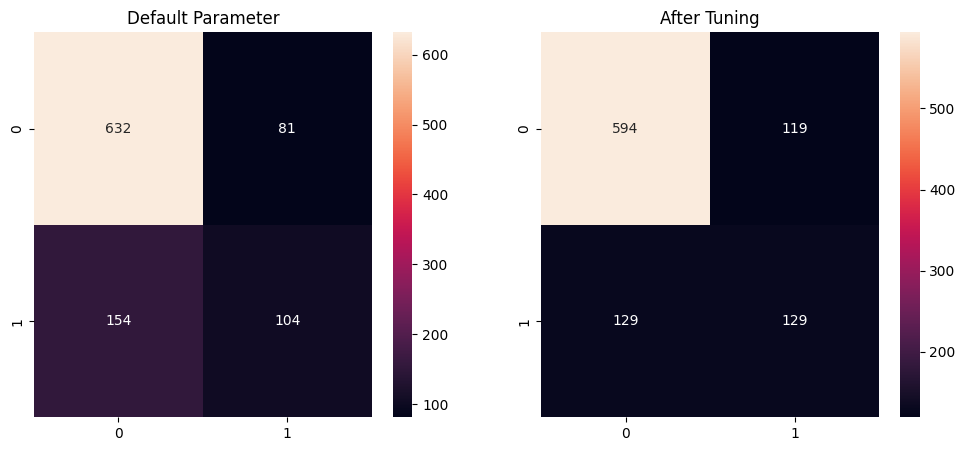

In [129]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_default), annot=True, fmt='.0f')
plt.title('Default Parameter')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_oversampling), annot=True, fmt='.0f');
plt.title('After Tuning');

Dilihat dari matrix, setelah tuning oversampling presisi berkurang dan recall meningkat. Sehingga, F1 score tidak cocok untuk dijadikan metric utama dan perlu menggunakan PR Curve untuk mencari nilai precision dan recall yang tepat

## PR Curve

In [130]:
# model
model = RandomForestClassifier(random_state=0)

# fit
model.fit(X_train_smote, y_train_smote)

# predict
y_pred_after_proba =model.predict_proba(X_test_encode_scale)[:,1]
y_pred_after_proba

array([0.6       , 0.47      , 0.14      , 0.28      , 0.        ,
       0.89      , 0.4       , 0.31      , 0.        , 0.09      ,
       0.02      , 0.41      , 0.03      , 0.2       , 0.        ,
       0.07      , 0.31      , 0.23      , 0.02      , 0.48      ,
       0.17      , 0.        , 0.        , 0.43      , 0.68      ,
       0.16      , 0.22      , 0.        , 0.01      , 0.48      ,
       0.32      , 0.33      , 0.        , 0.87      , 0.95      ,
       0.93      , 0.46      , 0.        , 0.07      , 0.15      ,
       0.84      , 0.1       , 0.08      , 0.48      , 0.42      ,
       0.7       , 0.57      , 0.29      , 0.        , 0.08383333,
       1.        , 0.85333333, 0.01      , 0.08      , 0.34      ,
       0.76      , 0.22      , 0.15      , 0.48      , 0.27      ,
       0.14      , 0.        , 0.85      , 0.88      , 0.17      ,
       0.        , 0.09      , 0.03      , 0.7       , 0.58      ,
       0.01      , 0.14      , 0.15      , 0.36      , 0.05   

In [131]:
precision, recall, threshold = precision_recall_curve(y_test_encode, y_pred_after_proba)
precision, recall, threshold

(array([0.26570546, 0.30227001, 0.30263158, 0.32183908, 0.33200531,
        0.34246575, 0.34887006, 0.36163982, 0.36842105, 0.3775351 ,
        0.38486312, 0.38548387, 0.39072848, 0.39863714, 0.40034662,
        0.40140845, 0.4021164 , 0.40720721, 0.41666667, 0.42234848,
        0.42638623, 0.43444227, 0.43538767, 0.44242424, 0.44057377,
        0.43541667, 0.43487395, 0.4373673 , 0.43617021, 0.4463895 ,
        0.44517544, 0.45168539, 0.4527027 , 0.45977011, 0.46682464,
        0.46555819, 0.47572816, 0.47688564, 0.4764268 , 0.47979798,
        0.48101266, 0.48691099, 0.49333333, 0.49197861, 0.49318801,
        0.49019608, 0.49157303, 0.49565217, 0.49418605, 0.49851632,
        0.49702381, 0.4969697 , 0.50154799, 0.5       , 0.49842271,
        0.50324675, 0.50662252, 0.50847458, 0.51557093, 0.51398601,
        0.5177305 , 0.51449275, 0.51291513, 0.51111111, 0.51737452,
        0.51984127, 0.52016129, 0.52226721, 0.52674897, 0.525     ,
        0.52340426, 0.51528384, 0.52232143, 0.52

In [132]:
df_threshold = pd.DataFrame()
df_threshold['threshold'] = list(threshold) + [1]
df_threshold['precision'] = precision 
df_threshold['recall'] = recall
df_threshold

,threshold,precision,recall
0,0.000000,0.265705,1.000000
1,0.005000,0.302270,0.980620
2,0.010000,0.302632,0.980620
3,0.020000,0.321839,0.976744
4,0.030000,0.332005,0.968992
...,...,...,...
122,0.988333,0.689655,0.077519
123,0.990000,0.714286,0.077519
124,0.995000,0.714286,0.038760
125,1.000000,0.692308,0.034884


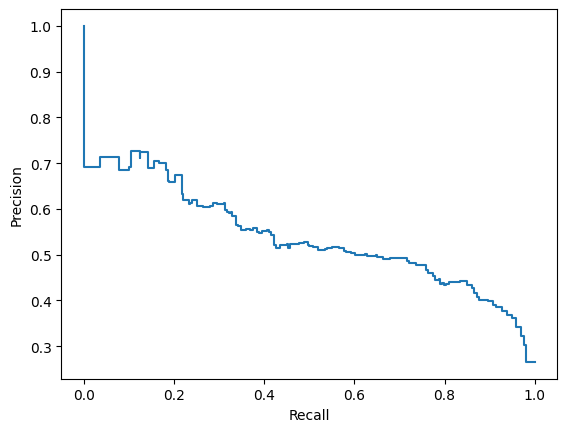

In [133]:
PrecisionRecallDisplay(precision, recall).plot();

Recall yang lebih tinggi --> kita perlu menekan nilai FN, karena untuk mengurangi Custumer yang sebenarnya churn tapi diprediksi tidak churn.

In [134]:
# model
model = RandomForestClassifier(random_state=0)

# fit
model.fit(X_train_smote, y_train_smote)

# predict
y_pred_after_proba =model.predict_proba(X_test_encode_scale)[:,1]

y_pred_class = np.where(y_pred_after_proba <0.02, 0, 1)
y_pred_class

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

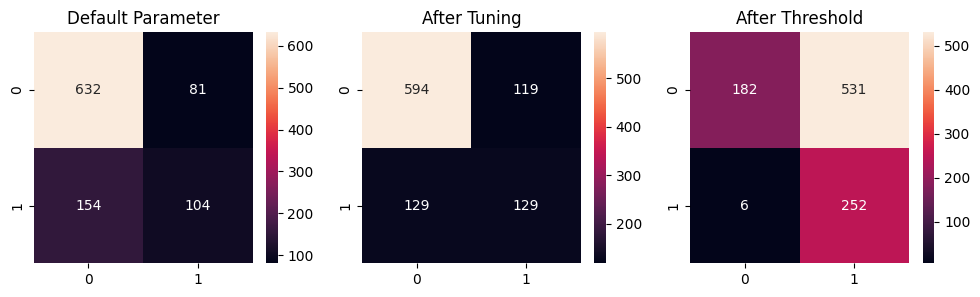

In [135]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_default), annot=True, fmt='.0f')
plt.title('Default Parameter')

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_oversampling), annot=True, fmt='.0f');
plt.title('After Tuning')

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_class), annot=True, fmt='.0f')
plt.title('After Threshold');

Default Parameter

In [136]:
print('recall : ', recall_score(y_test_encode, y_pred_default))
print('precision : ', precision_score(y_test_encode, y_pred_default))

recall :  0.40310077519379844
precision :  0.5621621621621622


After Tuning

In [137]:
print('recall : ', recall_score(y_test_encode, y_pred_oversampling))
print('precision : ', precision_score(y_test_encode, y_pred_oversampling))

recall :  0.5
precision :  0.5201612903225806


After Threshold

In [138]:
print('recall : ', recall_score(y_test_encode, y_pred_class))
print('precision : ', precision_score(y_test_encode, y_pred_class))

recall :  0.9767441860465116
precision :  0.3218390804597701


In [139]:
pickle.dump(model, open('Project 3 Ryan Adhimukti Prayitno.pkl', 'wb'))

## Feature Importances

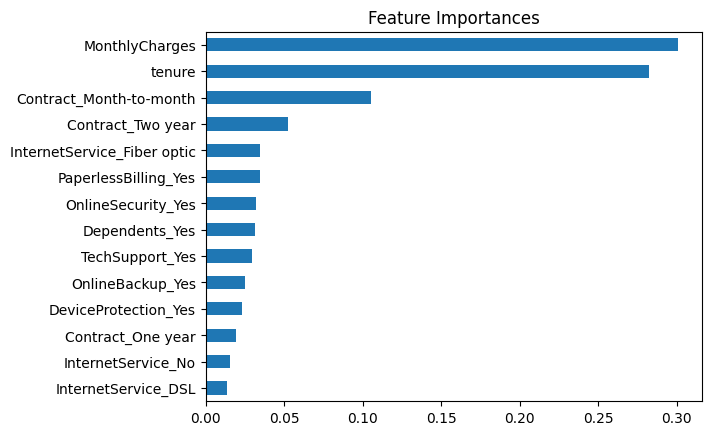

In [140]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importance = pd.Series(model.feature_importances_, index=df_encode_scale.columns.drop(['Churn'])).sort_values()
importance.plot(kind='barh', title='Feature Importances')
plt.show()

Feature yang paling menyebabkan customer churn adalah biaya layanan bulanan (Monthly Charges) yang besar, Tenure yang pendek, dan kontrak bulanan

## Conclusion

- Model terbaik menggunakan Random Forest yang telah dituning dengan oversampling SMOTE dan threshold menggunalan PR Curve
- Feature yang paling menyebabkan customer churn adalah biaya layanan bulanan (Monthly Charges) yang besar, Tenure yang pendek, dan kontrak bulanan
- Dengan model ini, yang diprediksi customer tidak churn tetapi kenyataan sebaliknya berkurang banyak dan customer yang diprediksi churn sebaliknya
- Before tuning:
    - recall    :  40.31%
    - precision :  56.22%
- After threshold:
    - recall    :  97.67%
    - precision :  32.18%

## Reccomendation

- Data tambahan seperti layanan telepon, streaming saluran tv, dan streaming film
- Perhatian khusus terhadap customer yang tenure pendek, dan kontrak bulanan
- Penawaran menarik bagi customer dengan biaya layanan tinggi dan kontrak bulanan 